In [27]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [28]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Classification number setting

In [29]:
NUM_CLASSES = 7

# Input length

In [30]:
TIME_STEPS = 16
DIMENSION = 2

# Reading training data

In [31]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [32]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [34]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [35]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                250       
                                                                 
 dense_5 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,119
Trainable params: 1,119
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [37]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [38]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/36 [..............................] - ETA: 9s - loss: 1.9693 - accuracy: 0.1641
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 5ms/step - loss: 1.9019 - accuracy: 0.3638 - val_loss: 1.8539 - val_accuracy: 0.4321
Epoch 2/1000
34/36 [===========================>..] - ETA: 0s - loss: 1.8029 - accuracy: 0.3699
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.8005 - accuracy: 0.3711 - val_loss: 1.7398 - val_accuracy: 0.4394
Epoch 3/1000
33/36 [==========================>...] - ETA: 0s - loss: 1.6957 - accuracy: 0.3617
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.6932 - accuracy: 0.3615 - val_loss: 1.6229 - val_accuracy: 0.4354
Epoch 4/1000
35/36 [============================>.] - ETA: 0s - los

 1/36 [..............................] - ETA: 0s - loss: 0.9292 - accuracy: 0.6562
Epoch 27: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.9457 - accuracy: 0.6378 - val_loss: 0.7105 - val_accuracy: 0.8455
Epoch 28/1000
 1/36 [..............................] - ETA: 0s - loss: 0.8751 - accuracy: 0.6719
Epoch 28: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.6409 - val_loss: 0.6983 - val_accuracy: 0.8429
Epoch 29/1000
 1/36 [..............................] - ETA: 0s - loss: 1.0339 - accuracy: 0.5781
Epoch 29: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.9287 - accuracy: 0.6467 - val_loss: 0.6857 - val_accuracy: 0.8449
Epoch 30/1000
 1/36 [..............................] - ETA: 0s - loss: 1.03

 1/36 [..............................] - ETA: 0s - loss: 0.8124 - accuracy: 0.6875
Epoch 53: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.8339 - accuracy: 0.6969 - val_loss: 0.5408 - val_accuracy: 0.8728
Epoch 54/1000
 1/36 [..............................] - ETA: 0s - loss: 0.8090 - accuracy: 0.6719
Epoch 54: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.6966 - val_loss: 0.5326 - val_accuracy: 0.8802
Epoch 55/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7772 - accuracy: 0.7109
Epoch 55: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.7890 - accuracy: 0.7082 - val_loss: 0.5299 - val_accuracy: 0.8822
Epoch 56/1000
 1/36 [..............................] - ETA: 0s - loss: 0.72

 1/36 [..............................] - ETA: 0s - loss: 0.7174 - accuracy: 0.7578
Epoch 79: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.7389 - accuracy: 0.7442 - val_loss: 0.4601 - val_accuracy: 0.8921
Epoch 80/1000
 1/36 [..............................] - ETA: 0s - loss: 0.8695 - accuracy: 0.6641
Epoch 80: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.7447 - accuracy: 0.7448 - val_loss: 0.4545 - val_accuracy: 0.9008
Epoch 81/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7647 - accuracy: 0.6719
Epoch 81: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.7333 - val_loss: 0.4527 - val_accuracy: 0.8995
Epoch 82/1000
 1/36 [..............................] - ETA: 0s - loss: 0.64

 1/36 [..............................] - ETA: 0s - loss: 0.6611 - accuracy: 0.8125
Epoch 105: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.7610 - val_loss: 0.4190 - val_accuracy: 0.9035
Epoch 106/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6502 - accuracy: 0.7734
Epoch 106: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.7524 - val_loss: 0.4167 - val_accuracy: 0.9028
Epoch 107/1000
 1/36 [..............................] - ETA: 0s - loss: 0.8344 - accuracy: 0.7266
Epoch 107: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.7579 - val_loss: 0.4143 - val_accuracy: 0.9068
Epoch 108/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5164 - accuracy: 0.8359
Epoch 131: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7750 - val_loss: 0.3947 - val_accuracy: 0.9075
Epoch 132/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6668 - accuracy: 0.7578
Epoch 132: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.7717 - val_loss: 0.3913 - val_accuracy: 0.9101
Epoch 133/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6367 - accuracy: 0.7344
Epoch 133: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.7626 - val_loss: 0.3970 - val_accuracy: 0.9081
Epoch 134/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.7882 - accuracy: 0.7578
Epoch 157: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7733 - val_loss: 0.3799 - val_accuracy: 0.9161
Epoch 158/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5832 - accuracy: 0.7812
Epoch 158: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7804 - val_loss: 0.3783 - val_accuracy: 0.9141
Epoch 159/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5148 - accuracy: 0.8047
Epoch 159: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7839 - val_loss: 0.3736 - val_accuracy: 0.9188
Epoch 160/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5436 - accuracy: 0.8047
Epoch 183: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7837 - val_loss: 0.3664 - val_accuracy: 0.9161
Epoch 184/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7500
Epoch 184: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7937 - val_loss: 0.3657 - val_accuracy: 0.9161
Epoch 185/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6553 - accuracy: 0.7969
Epoch 185: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.7797 - val_loss: 0.3631 - val_accuracy: 0.9168
Epoch 186/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5310 - accuracy: 0.8516
Epoch 209: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7817 - val_loss: 0.3549 - val_accuracy: 0.9154
Epoch 210/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6648 - accuracy: 0.7891
Epoch 210: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7861 - val_loss: 0.3560 - val_accuracy: 0.9161
Epoch 211/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5657 - accuracy: 0.8281
Epoch 211: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7924 - val_loss: 0.3541 - val_accuracy: 0.9161
Epoch 212/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.6289 - accuracy: 0.7969
Epoch 235: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7864 - val_loss: 0.3405 - val_accuracy: 0.9194
Epoch 236/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7010 - accuracy: 0.8047
Epoch 236: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7992 - val_loss: 0.3431 - val_accuracy: 0.9201
Epoch 237/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5641 - accuracy: 0.8359
Epoch 237: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7873 - val_loss: 0.3409 - val_accuracy: 0.9188
Epoch 238/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5808 - accuracy: 0.7734
Epoch 261: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.7964 - val_loss: 0.3364 - val_accuracy: 0.9201
Epoch 262/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6713 - accuracy: 0.7891
Epoch 262: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7904 - val_loss: 0.3344 - val_accuracy: 0.9214
Epoch 263/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7463 - accuracy: 0.7500
Epoch 263: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7972 - val_loss: 0.3358 - val_accuracy: 0.9194
Epoch 264/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5263 - accuracy: 0.8203
Epoch 287: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.8039 - val_loss: 0.3326 - val_accuracy: 0.9201
Epoch 288/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6250 - accuracy: 0.7891
Epoch 288: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7932 - val_loss: 0.3313 - val_accuracy: 0.9234
Epoch 289/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6141 - accuracy: 0.7656
Epoch 289: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.8068 - val_loss: 0.3323 - val_accuracy: 0.9201
Epoch 290/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5003 - accuracy: 0.8047
Epoch 313: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.8032 - val_loss: 0.3272 - val_accuracy: 0.9214
Epoch 314/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8516
Epoch 314: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.8001 - val_loss: 0.3237 - val_accuracy: 0.9221
Epoch 315/1000
 1/36 [..............................] - ETA: 0s - loss: 0.8274 - accuracy: 0.7891
Epoch 315: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.8046 - val_loss: 0.3244 - val_accuracy: 0.9201
Epoch 316/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7969
Epoch 339: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.8030 - val_loss: 0.3173 - val_accuracy: 0.9234
Epoch 340/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8438
Epoch 340: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.8059 - val_loss: 0.3206 - val_accuracy: 0.9208
Epoch 341/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5034 - accuracy: 0.8359
Epoch 341: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.8035 - val_loss: 0.3219 - val_accuracy: 0.9181
Epoch 342/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.4982 - accuracy: 0.8047
Epoch 365: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.8028 - val_loss: 0.3125 - val_accuracy: 0.9208
Epoch 366/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4505 - accuracy: 0.8203
Epoch 366: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.8021 - val_loss: 0.3106 - val_accuracy: 0.9301
Epoch 367/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6887 - accuracy: 0.7500
Epoch 367: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7999 - val_loss: 0.3150 - val_accuracy: 0.9208
Epoch 368/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8516
Epoch 391: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.8072 - val_loss: 0.3089 - val_accuracy: 0.9248
Epoch 392/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4974 - accuracy: 0.8125
Epoch 392: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.8119 - val_loss: 0.3077 - val_accuracy: 0.9254
Epoch 393/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4474 - accuracy: 0.8125
Epoch 393: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7999 - val_loss: 0.3118 - val_accuracy: 0.9268
Epoch 394/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.8536 - accuracy: 0.7344
Epoch 417: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.8079 - val_loss: 0.3023 - val_accuracy: 0.9341
Epoch 418/1000
 1/36 [..............................] - ETA: 0s - loss: 0.6312 - accuracy: 0.8047
Epoch 418: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8115 - val_loss: 0.3047 - val_accuracy: 0.9241
Epoch 419/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4326 - accuracy: 0.8203
Epoch 419: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.8188 - val_loss: 0.3057 - val_accuracy: 0.9228
Epoch 420/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.8154 - accuracy: 0.7500
Epoch 443: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8095 - val_loss: 0.2982 - val_accuracy: 0.9274
Epoch 444/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5684 - accuracy: 0.7734
Epoch 444: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.8123 - val_loss: 0.2982 - val_accuracy: 0.9274
Epoch 445/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5158 - accuracy: 0.8359
Epoch 445: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8123 - val_loss: 0.2989 - val_accuracy: 0.9214
Epoch 446/1000
 1/36 [..............................] - ETA: 0s - loss

 1/36 [..............................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8438
Epoch 469: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8139 - val_loss: 0.2977 - val_accuracy: 0.9294
Epoch 470/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5422 - accuracy: 0.8203
Epoch 470: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8050 - val_loss: 0.2949 - val_accuracy: 0.9268
Epoch 471/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4669 - accuracy: 0.8281
Epoch 471: saving model to model/point_history_classifier/point_history_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.8172 - val_loss: 0.2935 - val_accuracy: 0.9368
Epoch 472/1000
 1/36 [..............................] - ETA: 0s - loss

In [39]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [40]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 39ms/step
[9.6953791e-01 9.3994364e-03 1.2752171e-02 7.4135312e-03 1.7650846e-04
 1.8129803e-04 5.3900725e-04]
0


# mixed row

47/47 [==============================] - 0s 681us/step


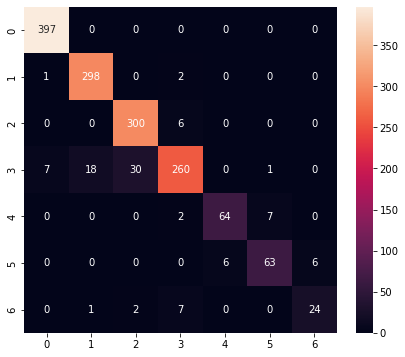

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       397
           1       0.94      0.99      0.96       301
           2       0.90      0.98      0.94       306
           3       0.94      0.82      0.88       316
           4       0.91      0.88      0.90        73
           5       0.89      0.84      0.86        75
           6       0.80      0.71      0.75        34

    accuracy                           0.94      1502
   macro avg       0.91      0.89      0.90      1502
weighted avg       0.94      0.94      0.93      1502



In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [42]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [43]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [44]:
# Transform (quantize) model
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpc_8jyqju/assets


INFO:tensorflow:Assets written to: /tmp/tmpc_8jyqju/assets
2022-06-10 17:30:47.476843: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-06-10 17:30:47.476918: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-06-10 17:30:47.479701: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpc_8jyqju
2022-06-10 17:30:47.485898: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-06-10 17:30:47.485946: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpc_8jyqju
2022-06-10 17:30:47.491843: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-10 17:30:47.515107: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpc_8jyqju
2022-06-10 17:30:47.525452: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

6536

# Inference test

In [45]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [46]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [47]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [48]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 272 µs, sys: 22 µs, total: 294 µs
Wall time: 232 µs


In [49]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6953803e-01 9.3994411e-03 1.2752176e-02 7.4135354e-03 1.7650866e-04
 1.8129824e-04 5.3900748e-04]
0


In [50]:
print("done")

done
